# Iris backpropagation

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pickle

In [13]:
datairis="https://raw.githubusercontent.com/cindylmr19/dataset/main/iris.csv"
iris=pd.read_csv(datairis)

In [14]:
iris.sample(150)

,sepallength,sepalwidth,petallength,petalwidth,class
40,5.0,3.5,1.3,0.3,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
...,...,...,...,...,...
76,6.8,2.8,4.8,1.4,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa


In [15]:
iris_copy = iris.copy()
iris_copy.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [16]:
iris_copy = iris_copy.replace('?',np.nan)

In [17]:
iris_copy.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [18]:
iris_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
data1 = iris.drop(columns=['class'])
data1.head(150)

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
# Get features and Target
X = iris_copy[['sepallength',	'sepalwidth',	'petallength',	'petalwidth']]
y = iris_copy ['class']

In [21]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [22]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Menyimpan model ke file
with open('preposcesing.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [24]:
X_train_scaled.shape

(120, 4)

In [25]:
X_train_scaled

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [26]:
backpro = MLPClassifier(random_state=42, hidden_layer_sizes=(150,100,50),
                        max_iter = 300, activation = 'logistic',
                        solver = 'adam', alpha=0.0001)

# melakukan training pada model 
backpro.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              max_iter=300, random_state=42)

In [27]:
y_pred = backpro.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 1.00


In [28]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: class, dtype: object

In [29]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

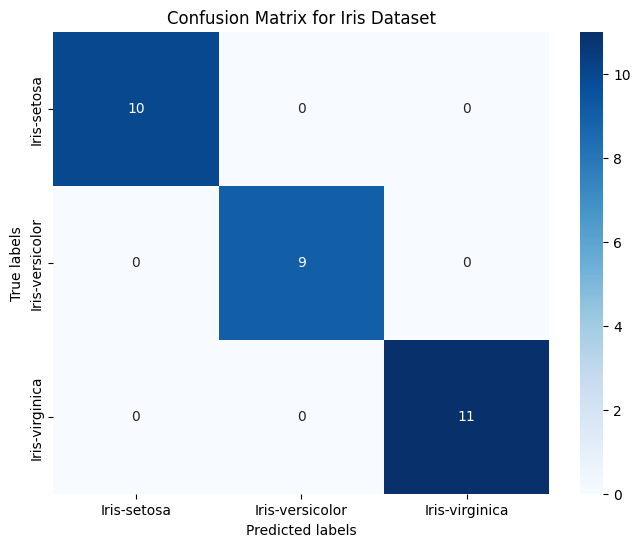

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=backpro.classes_, yticklabels=backpro.classes_)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [31]:
print(y_test, y_pred)

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: class, dtype: object ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 

In [32]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [33]:
# Menyimpan model ke file
with open('backpro_model.pkl', 'wb') as file:
    pickle.dump(backpro, file)

In [34]:
# Memuat/load model dari file
with open('backpro_model.pkl', 'rb') as file:
    backpro_loaded = pickle.load(file)


# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = backpro_loaded.predict(X_test_scaled)

# Buat data baru
new_data = np.array([[5,	4,	1,	1.5]])

# Memuat/load model dari file
with open('preposcesing.pkl', 'rb') as file:
    prepocesing_loaded = pickle.load(file)

# Scaling data baru menggunakan skalar yang telah dilatih sebelumnya
new_data_scaled = prepocesing_loaded.transform(new_data)

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = backpro_loaded.predict(new_data_scaled)
print(y_pred)

['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
